#   <b>Multiclass Classification(Crop Dataset)

### <b>Importing Libraries

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import re
import pickle
from tqdm import tqdm
import os
from google.colab import files
from google.colab import drive
import io
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from joblib import dump, load

In [0]:
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### <i>Above step required only if you are using colab

In [0]:
data=pd.read_csv("/content/drive/My Drive/cpdata.csv")

In [0]:
print("Number of data points in train data",data.shape)
print('-'*50)
print("The attributes of data :",data.columns.values)
data.head()

Number of data points in train data (3100, 5)
--------------------------------------------------
The attributes of data : ['temperature' 'humidity' 'ph' 'rainfall' 'label']


,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [0]:
print(data['label'].value_counts())

muskmelon       100
Jute            100
Kidney Beans    100
Coffee          100
Peas            100
grapes          100
Pigeon Peas     100
Cotton          100
Coconut         100
apple           100
mango           100
Chickpea        100
Adzuki Beans    100
pomegranate     100
wheat           100
Moth Beans      100
Mung Bean       100
banana          100
Sugarcane       100
millet          100
watermelon      100
papaya          100
rice            100
Tea             100
Rubber          100
Lentil          100
maize           100
Ground Nut      100
Tobacco         100
Black gram      100
orange          100
Name: label, dtype: int64


In [0]:
data.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [0]:
(data==np.nan).any()

temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

### <i>We can see that the data set is completely balanced and there are no missing values. Hence, no futher interpolation or imputation of missing data required.

### <i>Let us convert the Labels into numbers for classification 

In [0]:
Type={}
for i,j in enumerate(data.label.unique()):
    Type[j]=i
print(Type)   
crop=[]
for i in data.label:
    crop.append(Type[i])
data['label']=crop    


{'rice': 0, 'wheat': 1, 'Mung Bean': 2, 'Tea': 3, 'millet': 4, 'maize': 5, 'Lentil': 6, 'Jute': 7, 'Coffee': 8, 'Cotton': 9, 'Ground Nut': 10, 'Peas': 11, 'Rubber': 12, 'Sugarcane': 13, 'Tobacco': 14, 'Kidney Beans': 15, 'Moth Beans': 16, 'Coconut': 17, 'Black gram': 18, 'Adzuki Beans': 19, 'Pigeon Peas': 20, 'Chickpea': 21, 'banana': 22, 'grapes': 23, 'apple': 24, 'mango': 25, 'muskmelon': 26, 'orange': 27, 'papaya': 28, 'pomegranate': 29, 'watermelon': 30}


In [0]:
data.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,0
1,21.770462,80.319644,7.038096,226.655537,0
2,23.004459,82.320763,7.840207,263.964248,0
3,26.491096,80.158363,6.980401,242.864034,0
4,20.130175,81.604873,7.628473,262.717340,0


# <b>Data Visualization

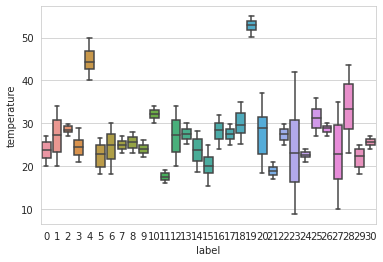

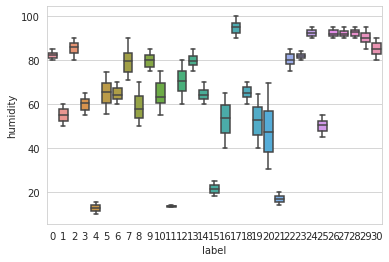

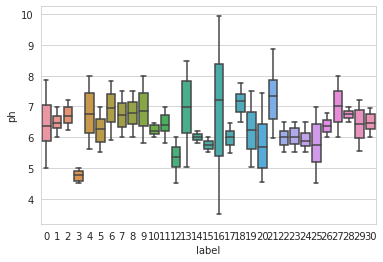

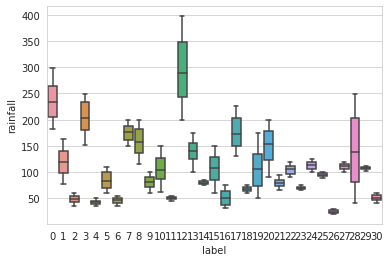

In [0]:
cols=list(data.columns.unique())
for col in cols[:-1]:
    sns.set_style("whitegrid")
    sns.boxplot('label',col, data=data)
    plt.xlabel("label") # Set text for the x axis
    plt.ylabel(col)# Set text for y axis
    plt.show()

### <i>We can see that the pH of various crops are similar and there inter quartile ranges overlap for most of them.Hence this would not a predictive feature on its own but the fact that their no much correlation of it with other features,can make it a potential feature when combined with other three.Therefore it is best to consider all the features for the model training.<br><br>It can also be observed from the box plots that there no outliers as such in the data.Hence ,no worries about the outliers.

# <b>Data Splitting  

### <i>We split the data into Train data - used for training a model<br>Cross Validation data - used for tuning the hyper parameters<br>Test data - used for testing the trained model



In [0]:
data=shuffle(data)
y=data['label']
X=data.drop(['label'],axis=1)
print("The shape of X:",X.shape)
print("The shape of y:",y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.25,stratify=y_train)
print("The shape of train data:",'X:',X_train.shape,'y:',y_train.shape)
print("The shape of test data:",'X:',X_test.shape,'y:',y_test.shape)
print("The shape of cv data:",'X:',X_cv.shape,'y:',y_cv.shape)

The shape of X: (3100, 4)
The shape of y: (3100,)
The shape of train data: X: (1906, 4) y: (1906,)
The shape of test data: X: (558, 4) y: (558,)
The shape of cv data: X: (636, 4) y: (636,)


# <b>Scaling the data 

### <i>We use MinMax Scaling rather than  Z-score /Standard Scaling as most of them are far from <b>Normal</b> behaviour.

In [0]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_cv=scaler.transform(X_cv)

# <b>Model Training

## <b>K Nearest Neighbors

In [0]:
best_k=0
best_score=0
lb=LabelBinarizer()
lb.fit(y_cv)
binary=lb.transform(y_cv)
for k in range(5,61,5):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_cv)
    pred=lb.transform(pred)
    score=roc_auc_score(binary,pred)
    if best_score<=score:
        best_k=k
        best_score=score
print("The optimal value for k is:",best_k) 

The optimal value for k is: 5


### <i>Train the final model with optimal parameter

In [0]:
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
lb.fit(y_test)
binary=lb.transform(y_test)
predF=lb.transform(pred)
score=roc_auc_score(binary,predF)
print("The auc is :",score)

The auc is : 0.9407407407407408


### <i>Printing out some Actual and predicted Labels

In [0]:
ReturnType={v:k for k,v in Type.items()}
table= PrettyTable()
test=list(y_test)
pred=list(map(lambda a:ReturnType[a],pred[:500:25]))
test=list(map(lambda a:ReturnType[a],test[:500:25]))
table.add_column("Actual_label",test)
table.add_column("Predicted_label",pred)
print(table)

+--------------+-----------------+
| Actual_label | Predicted_label |
+--------------+-----------------+
|    orange    |      orange     |
|  Moth Beans  |    Moth Beans   |
|  Moth Beans  |    Moth Beans   |
|    grapes    |      grapes     |
|    wheat     |      wheat      |
|     rice     |       Jute      |
|  Ground Nut  |    Ground Nut   |
|   Chickpea   |     Chickpea    |
|   Tobacco    |     Tobacco     |
| Adzuki Beans |   Adzuki Beans  |
|  Mung Bean   |    Mung Bean    |
|    banana    |      banana     |
|   Tobacco    |     Tobacco     |
|    maize     |     Tobacco     |
|    orange    |      orange     |
|  muskmelon   |    muskmelon    |
|     Tea      |       Tea       |
|    wheat     |      mango      |
|  Mung Bean   |    watermelon   |
|   Chickpea   |     Chickpea    |
+--------------+-----------------+


## <b>Support Vector Machine

In [0]:
best_C=0
best_score=0
lb=LabelBinarizer()
lb.fit(y_cv)
binary=lb.transform(y_cv)
for c in range(-5,6,1):
    clf = SVC(C=2**c,kernel='rbf',gamma='scale')
    clf.fit(X_train,y_train)
    pred=clf.predict(X_cv)
    pred=lb.transform(pred)
    score=roc_auc_score(binary,pred)
    if best_score<=score:
        best_C=c
        best_score=score
print("The optimal value for C is:",2**best_C) 

The optimal value for C is: 32


In [0]:
svm =SVC(C=32,gamma='scale',kernel='rbf')
svm.fit(X_train,y_train)
pred=svm.predict(X_test)
lb.fit(y_test)
binary=lb.transform(y_test)
predF=lb.transform(pred)
score=roc_auc_score(binary,predF)
print("The auc is :",score)

The auc is : 0.9444444444444443


In [0]:
table= PrettyTable()
test=list(y_test)
pred=list(map(lambda a:ReturnType[a],pred[:500:25]))
test=list(map(lambda a:ReturnType[a],test[:500:25]))
table.add_column("Actual_label",test)
table.add_column("Predicted_label",pred)
print(table)    

+--------------+-----------------+
| Actual_label | Predicted_label |
+--------------+-----------------+
|    orange    |     Coconut     |
|  Moth Beans  |    Moth Beans   |
|  Moth Beans  |    Moth Beans   |
|    grapes    |      grapes     |
|    wheat     |      wheat      |
|     rice     |       rice      |
|  Ground Nut  |    Ground Nut   |
|   Chickpea   |     Chickpea    |
|   Tobacco    |     Tobacco     |
| Adzuki Beans |   Adzuki Beans  |
|  Mung Bean   |    Mung Bean    |
|    banana    |      banana     |
|   Tobacco    |     Tobacco     |
|    maize     |      maize      |
|    orange    |      orange     |
|  muskmelon   |    muskmelon    |
|     Tea      |       Tea       |
|    wheat     |      wheat      |
|  Mung Bean   |    watermelon   |
|   Chickpea   |     Chickpea    |
+--------------+-----------------+


## <b>Decision Tree 

In [0]:
best_depth=0
best_score=0
lb=LabelBinarizer()
lb.fit(y_cv)
binary=lb.transform(y_cv)
for d in range(2,21,2):
    clf = DecisionTreeClassifier(max_depth=d, random_state=3457)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_cv)
    pred=lb.transform(pred)
    score=roc_auc_score(binary,pred)
    if best_score<=score:
        best_depth=d
        best_score=score
print("The optimal depth is:",best_depth) 

The optimal depth is: 16


In [0]:
DT = DecisionTreeClassifier(max_depth=16, random_state=3457)
DT.fit(X_train,y_train)
pred=DT.predict(X_test)
lb.fit(y_test)
binary=lb.transform(y_test)
predF=lb.transform(pred)
score=roc_auc_score(binary,predF)
print("The auc is :",score)

The auc is : 0.9444444444444445


In [0]:
table= PrettyTable()
test=list(y_test)
pred=list(map(lambda a:ReturnType[a],pred[:500:25]))
test=list(map(lambda a:ReturnType[a],test[:500:25]))
table.add_column("Actual_label",test)
table.add_column("Predicted_label",pred)
print(table) 

+--------------+-----------------+
| Actual_label | Predicted_label |
+--------------+-----------------+
|    orange    |      orange     |
|  Moth Beans  |    Moth Beans   |
|  Moth Beans  |    Moth Beans   |
|    grapes    |      grapes     |
|    wheat     |      wheat      |
|     rice     |       rice      |
|  Ground Nut  |    Ground Nut   |
|   Chickpea   |     Chickpea    |
|   Tobacco    |     Tobacco     |
| Adzuki Beans |   Adzuki Beans  |
|  Mung Bean   |    Mung Bean    |
|    banana    |    Sugarcane    |
|   Tobacco    |     Tobacco     |
|    maize     |   Pigeon Peas   |
|    orange    |      orange     |
|  muskmelon   |    muskmelon    |
|     Tea      |       Tea       |
|    wheat     |      wheat      |
|  Mung Bean   |    Mung Bean    |
|   Chickpea   |     Chickpea    |
+--------------+-----------------+


## <b>Random Forest Ensemble Model

In [0]:
best_depth=0
best_score=0
lb=LabelBinarizer()
lb.fit(y_cv)
binary=lb.transform(y_cv)
for d in range(2,21,2):
    clf = RandomForestClassifier(max_depth=d, random_state=3457,n_estimators=80)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_cv)
    pred=lb.transform(pred)
    score=roc_auc_score(binary,pred)
    if best_score<=score:
        best_depth=d
        best_score=score
print("The optimal depth is:",best_depth)        

The optimal depth is: 20


In [0]:
RF= RandomForestClassifier(max_depth=20, random_state=3457,n_estimators=80)
RF.fit(X_train,y_train)
pred=RF.predict(X_test)
lb.fit(y_test)
binary=lb.transform(y_test)
predF=lb.transform(pred)
score=roc_auc_score(binary,predF)
print("The auc is :",score)

The auc is : 0.9703703703703703


In [0]:
table= PrettyTable()
test=list(y_test)
pred=list(pred)
predT=list(map(lambda a:ReturnType[a],pred[:500:25]))
testT=list(map(lambda a:ReturnType[a],test[:500:25]))
table.add_column("Actual_label",testT)
table.add_column("Predicted_label",predT)
print(table)

+--------------+-----------------+
| Actual_label | Predicted_label |
+--------------+-----------------+
|    orange    |      orange     |
|  Moth Beans  |    Moth Beans   |
|  Moth Beans  |    Moth Beans   |
|    grapes    |      grapes     |
|    wheat     |      wheat      |
|     rice     |       rice      |
|  Ground Nut  |    Ground Nut   |
|   Chickpea   |     Chickpea    |
|   Tobacco    |     Tobacco     |
| Adzuki Beans |   Adzuki Beans  |
|  Mung Bean   |    Mung Bean    |
|    banana    |      banana     |
|   Tobacco    |     Tobacco     |
|    maize     |      maize      |
|    orange    |      orange     |
|  muskmelon   |    muskmelon    |
|     Tea      |       Tea       |
|    wheat     |      wheat      |
|  Mung Bean   |    Mung Bean    |
|   Chickpea   |     Chickpea    |
+--------------+-----------------+


## <b>Accuracy of individual CropType

In [0]:
from collections import defaultdict
predCount=defaultdict(int)
for i in range(len(pred)):
    if pred[i]==test[i]:
        predCount[pred[i]]+=1
for ele in data['label'].unique():
    predCount[ele]/=test.count(ele)
x=[]
y=[]
for i ,j in dict(predCount).items():
    x.append(ReturnType[i])
    y.append(j*100)            

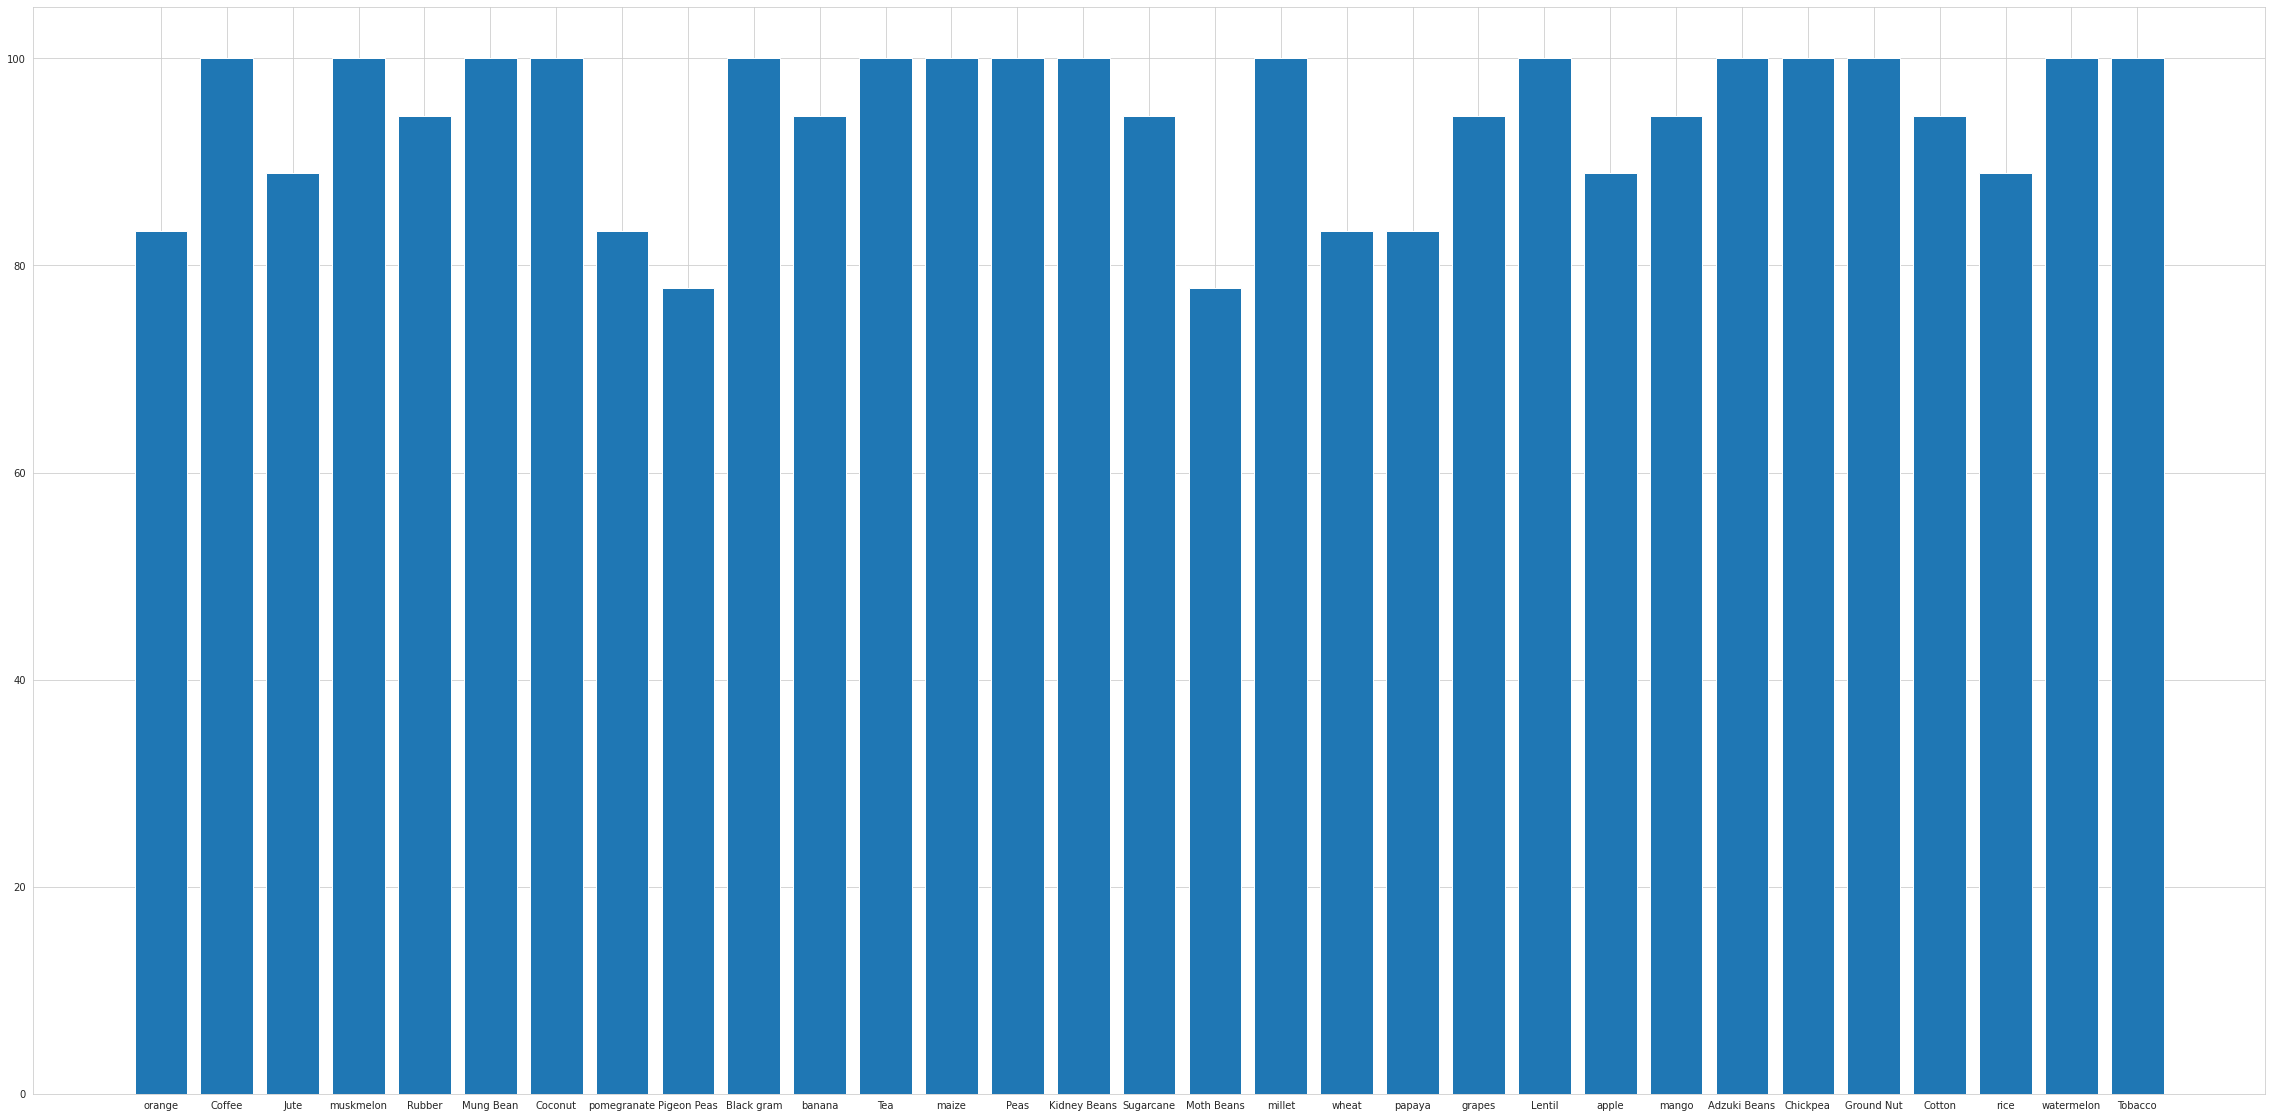

In [0]:
plt.figure(figsize=(40,20))
plt.bar(x,y)
plt.show()

In [0]:
table= PrettyTable()
model=x
AUC=y
table.add_column("Crop_Type",x)
table.add_column("Accuracy",list(map(lambda x:round(x,2),y)))
print(table)

+--------------+----------+
|  Crop_Type   | Accuracy |
+--------------+----------+
|    orange    |  83.33   |
|    Coffee    |  100.0   |
|     Jute     |  88.89   |
|  muskmelon   |  100.0   |
|    Rubber    |  94.44   |
|  Mung Bean   |  100.0   |
|   Coconut    |  100.0   |
| pomegranate  |  83.33   |
| Pigeon Peas  |  77.78   |
|  Black gram  |  100.0   |
|    banana    |  94.44   |
|     Tea      |  100.0   |
|    maize     |  100.0   |
|     Peas     |  100.0   |
| Kidney Beans |  100.0   |
|  Sugarcane   |  94.44   |
|  Moth Beans  |  77.78   |
|    millet    |  100.0   |
|    wheat     |  83.33   |
|    papaya    |  83.33   |
|    grapes    |  94.44   |
|    Lentil    |  100.0   |
|    apple     |  88.89   |
|    mango     |  94.44   |
| Adzuki Beans |  100.0   |
|   Chickpea   |  100.0   |
|  Ground Nut  |  100.0   |
|    Cotton    |  94.44   |
|     rice     |  88.89   |
|  watermelon  |  100.0   |
|   Tobacco    |  100.0   |
+--------------+----------+


## <b>Comparisons

In [0]:
table= PrettyTable()
model=['KNN','Support Vector Machine','Decision Tree','Random Forest']
AUC=[0.94259,0.96018,0.95555,0.96574]
table.add_column("Model",model)
table.add_column("AUC",AUC)
print(table)

+------------------------+---------+
|         Model          |   AUC   |
+------------------------+---------+
|          KNN           | 0.94259 |
| Support Vector Machine | 0.96018 |
|     Decision Tree      | 0.95555 |
|     Random Forest      | 0.96574 |
+------------------------+---------+


# <b>Saving the model

In [0]:
dump(RF, '/content/drive/My Drive/CropPredictRF.joblib')
dump(scaler,'/content/drive/My Drive/CropScaler.joblib')

### <i>The saved persisted model can be loaded whenever required<br>It is very important to Scale the new features incoming using the same Scaler which was used during the MinMax scaling.<br>1)Load both model and scaler<br>2)Transform new data by using transform method of scaler object<br>3)Use predict method of RFmodel object  